In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r'Salary Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
data = data.drop(columns=['Age', 
                      'Education Level', 
                      'Gender', 
                      'Job Title' 
                ])
data

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [6]:
data.describe()

,Years of Experience,Salary
count,373.000000,373.000000
mean,10.030831,100577.345845
std,6.557007,48240.013482
min,0.000000,350.000000
25%,4.000000,55000.000000
50%,9.000000,95000.000000
75%,15.000000,140000.000000
max,25.000000,250000.000000


In [7]:
data.duplicated().sum()

220

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
Years of Experience,1,0.645161
Salary,1,0.645161


In [10]:
data = data.dropna()

In [11]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
Years of Experience,0,0.0
Salary,0,0.0


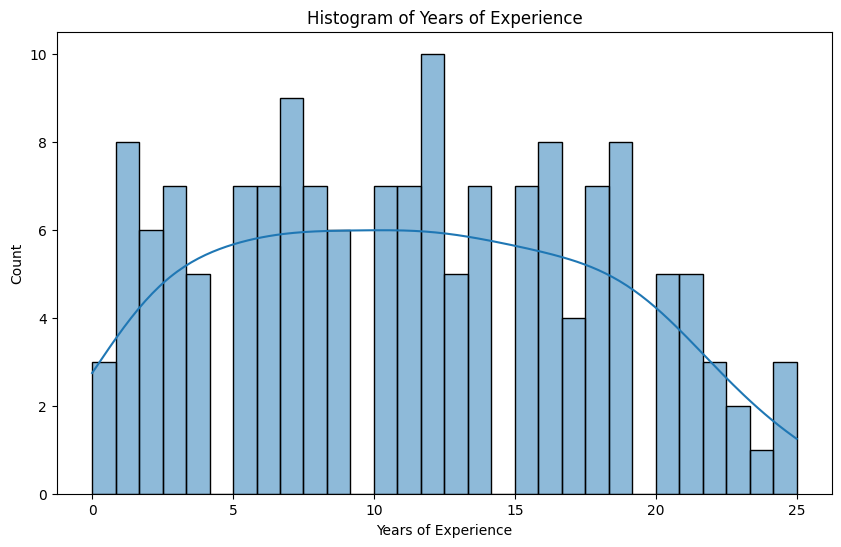

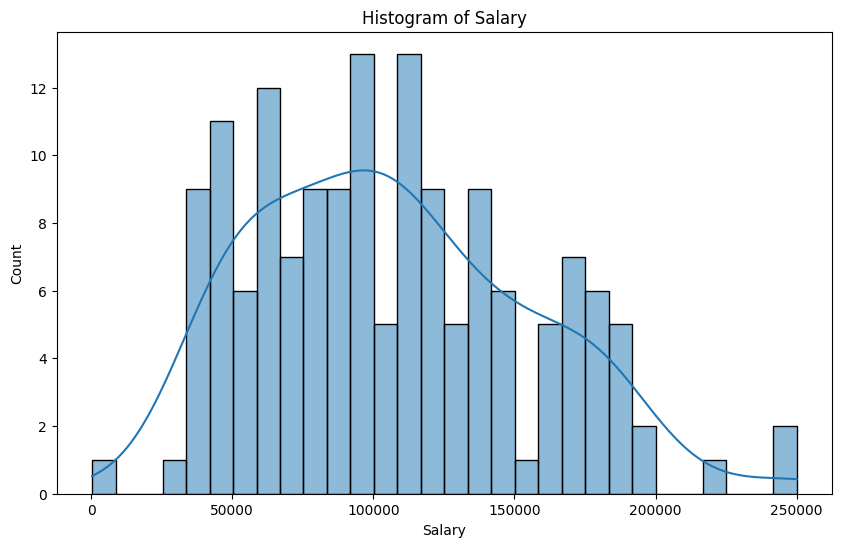

In [12]:
for col in data.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram of {col}')
    sns.histplot(data[col], bins=30, kde=True)
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['Years of Experience']
Y = data['Salary']
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
## confusion matrics
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(x_test)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

mse = np.mean((y_pred - y_test) ** 2)
print(f"MSE: {mse}")

mae = np.mean(np.abs(y_pred - y_test))
print(f"MAE: {mae}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


MSE: 1029936113.7932825
MAE: 23004.76349019257
RMSE: 32092.617746037522


In [16]:
# f1 Score
from sklearn.metrics import f1_score

# Convert y_test and y_pred to binary values for classification metrics
y_test_binary = (y_test > y_test.mean()).astype(int)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary, average='binary')
print(f"F1 Score: {f1}")



F1 Score: 0.896551724137931


In [17]:
# r2 score, precision, accuracy
from sklearn.metrics import r2_score, precision_score, accuracy_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

precision = precision_score(y_test_binary, y_pred_binary, average='binary')
print(f"Precision: {precision}")

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

R2 Score: 0.6529502251598576
Precision: 0.8666666666666667
Accuracy: 0.9032258064516129


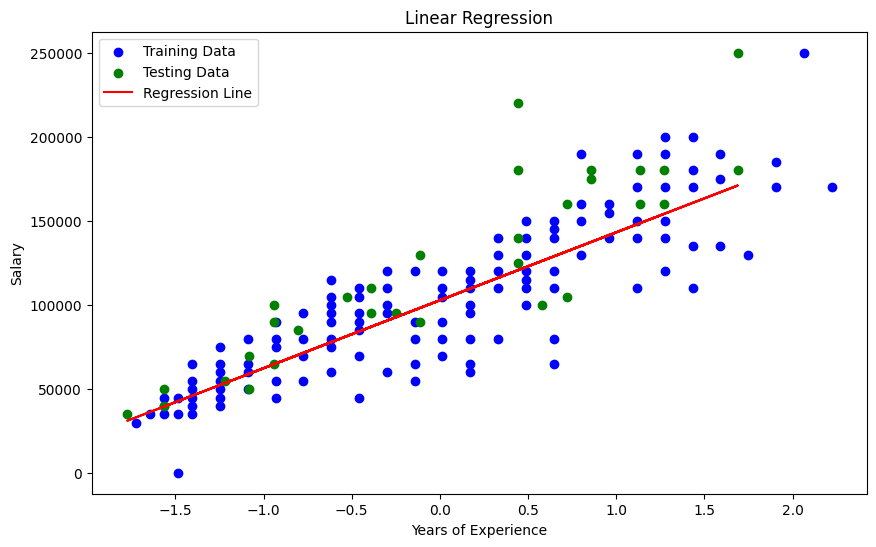

In [18]:
# Plotting the regression line
plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Testing Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()